# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Для выполнения проекта, представлены данные проб нефти в трех регионах. Требуется построить модель машинного обучения, которая определит регион, где добыча принесет наибольшую прибыль.

Для анализа будет испльзована техника Bootstrap, для определения возможных рисков и прибыли.

## Загрузка и подготовка данных

In [1]:
# Выполним установку

!pip install phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

RANDOM_STATE = 43

**Описание данных**

Данные для выполнения проекта находятся в нескольких таблицах:

- Каждая таблица: `geo_data_0`, `geo_data_1`, `geo_data_3`, имееют 5 признаков:


    - `id` — уникальный идентификатор скважины;
    - `f0, f1, f3` — три признака точек (неважно, что они означают, но сами признаки значимы);
    - `product` — объём запасов в скважине (тыс. баррелей).

In [3]:
# Загрузим данные избегая ошибки
try: # Выплним загрузку с сервера:
    geo_d1 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_d2 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_d3 = pd.read_csv('/datasets/geo_data_2.csv')
except: # Укажем абсолютный путь
    geo_d1 = pd.read_csv(r'C:\Users\abdulagadzhi\Desktop\Файлы\MyProjects\yandex_pract\Базы данных\Модуль 3 спринт 1\geo_data_0.csv')
    geo_d2 = pd.read_csv(r'C:\Users\abdulagadzhi\Desktop\Файлы\MyProjects\yandex_pract\Базы данных\Модуль 3 спринт 1\geo_data_1.csv')
    geo_d3 = pd.read_csv(r'C:\Users\abdulagadzhi\Desktop\Файлы\MyProjects\yandex_pract\Базы данных\Модуль 3 спринт 1\geo_data_2.csv')

In [4]:
# Функция для ознакомления с таблицами
def first_check(data, dataset_name=""):
    # Печатаем название датасета
    if dataset_name:
        print(f"Анализ датасета: {dataset_name}")
    else:
        print("Анализ датасета")
    print("=" * 40 + "\n")
    
    # Первые и последние строки
    print("Первые 5 строк:")
    display(data.head())
    print("\nПоследние 5 строк:")
    display(data.tail())
    
    # Информация о данных
    print("\nИнформация о данных:")
    display(data.info())
    
    # Описательная статистика
    print("\nОписательная статистика:")
    display(data.describe(include='all'))

In [5]:
first_check(geo_d1, 'geo_d1')

Анализ датасета: geo_d1

Первые 5 строк:


id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


Последние 5 строк:


id        f0        f1        f2     product
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99990            NaN            NaN            NaN            NaN
top      74z30            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.500419       0.250143       2.502647      92.500000
std        NaN       0.871832       0.504433       3.248248      44.288691
min        NaN      -1.408605      -0.848218     -12.088328       0.000000
25%        NaN      -0.072580      -0.200881       0.287748      56.497507
50%        NaN       0.502360       0.250252       2.515969      91.849972
75%        NaN       1.073581       0.700646       4.715088     128.564089
max        NaN       2.362331       1.343769      16.003790     185.364347

- Всего в датасете `geo_d1` 5 столбцов и 100000 строк. При первичном анализе пропуски в столбцах не обнаружены. Замечано, что в стобце `id` присудствуют дубликаты.

In [6]:
first_check(geo_d2, 'geo_d2')

Анализ датасета: geo_d2

Первые 5 строк:


id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


Последние 5 строк:


id         f0         f1        f2     product
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      wt4Uk            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       1.141296      -4.796579       2.494541      68.825000
std        NaN       8.965932       5.119872       1.703572      45.944423
min        NaN     -31.609576     -26.358598      -0.018144       0.000000
25%        NaN      -6.298551      -8.267985       1.000021      26.953261
50%        NaN       1.153055      -4.813172       2.011479      57.085625
75%        NaN       8.621015      -1.332816       3.999904     107.813044
max        NaN      29.421755      18.734063       5.019721     137.945408

- Всего в датасете `geo_d2` 5 столбцов и 100000 строк. При первичном анализе пропуски в столбцах не обнаружены. Замечано, что в стобце `id` присудствуют дубликаты.

In [7]:
first_check(geo_d3, 'geo_d3')

Анализ датасета: geo_d3

Первые 5 строк:


id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


Последние 5 строк:


id        f0        f1        f2     product
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      xCHr8            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.002023      -0.002081       2.495128      95.000000
std        NaN       1.732045       1.730417       3.473445      44.749921
min        NaN      -8.760004      -7.084020     -11.970335       0.000000
25%        NaN      -1.162288      -1.174820       0.130359      59.450441
50%        NaN       0.009424      -0.009482       2.484236      94.925613
75%        NaN       1.158535       1.163678       4.858794     130.595027
max        NaN       7.238262       7.844801      16.739402     190.029838

- Всего в датасете `geo_d3` 5 столбцов и 100000 строк. При первичном анализе пропуски в столбцах не обнаружены. Замечано, что в стобце `id` присудствуют дубликаты.

## Преобработка данных

Используем функцию `check_data`, для общего аналища данных

In [8]:
def check_data(data, bins=10, figsize=(15, 8)):
    print('Первые строки данных:')
    display(data.head())

    print('\nПоследние строки данных:')
    display(data.tail())

    print('\nРазмерность данных:')
    display(data.shape)

    print('\nИнформация о типах данных и пропусках:')
    display(data.info())

    print("\nОписательная статистика:")
    display(data.describe(include='all'))

    # Анализ пропусков
    print('\nПропуски (количество и доля):')
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['total', 'percent'])

    # Проверяем, есть ли пропуски
    if missing_data['total'].sum() > 0:
        print(missing_data[missing_data['total'] > 0])  # Вывод только столбцов с пропусками
    else:
        print('Пропуски отсутствуют в данных.')

    # Анализ количественных столбцов
    numeric_columns = data.select_dtypes(include=['number']).columns
    numeric_columns = numeric_columns[numeric_columns != 'id']  # Исключаем столбец 'id'
    
    # Разделение на дискретные и непрерывные
    discrete_columns = []
    continuous_columns = []
    for col in numeric_columns:
        if data[col].nunique() < 10:  # Пороговое значение для определения дискретности
            discrete_columns.append(col)
        else:
            continuous_columns.append(col)
    
    # Построение гистограмм для непрерывных столбцов
    if continuous_columns:  # Проверка на наличие числового столбца
        print('\nГрафики распределения для количественных непрерывных столбцов (гистограммы):')
        # Определяем количество строк и столбцов для подграфиков
        n_cols = 2
        n_rows = (len(continuous_columns) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        axes = axes.flatten()
        
        for i, col in enumerate(continuous_columns):
            axes[i].hist(data[col], bins=bins, color='blue')
            axes[i].grid(True)
            axes[i].set_title(f'Распределение для {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Количество')
        
        # Убираем пустые подграфики, если они есть
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout() # Автоматически подгоняет подграфики
        plt.show()
    
    # Построение столбиковых диаграмм для дискретных столбцов
    if discrete_columns:  # Проверка на наличие числового столбца
        print('\nГрафики распределения для количественных дискретных столбцов (столбчатые диаграммы):')
        # Определяем количество строк и столбцов для подграфиков
        n_cols = 2
        n_rows = (len(discrete_columns) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        axes = axes.flatten()  # Создаем одномерный массив
        
        for i, col in enumerate(discrete_columns):
            value_counts = data[col].value_counts().sort_index()
            axes[i].bar(value_counts.index, value_counts.values, color='green')
            axes[i].grid(True)            
            axes[i].set_title(f'Распределение для {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Количество')
        
        # Убираем пустые подграфики, если они есть
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout() # Автоматически подгоняет подграфики
        plt.show()

    # Анализ категориальных столбцов
    categorical_columns = data.select_dtypes(exclude=['number']).columns
    if not categorical_columns.empty:
        print('\nАнализ категориальных столбцов:')
        for col in categorical_columns:
            print(f'\nСтолбец: {col}')
            value_counts = data[col].value_counts()
            n_unique = data[col].nunique()
            
            # Порог для определения "много/мало" уникальных значений
            threshold = 10
            
            if n_unique > threshold:
                # Если много уникальных значений, показываем только те, что встречаются 2+ раза
                frequent_values = value_counts[value_counts >= 2]
                if not frequent_values.empty:
                    print('Значения, встречающиеся 2 раза и больше:')
                    print(frequent_values)
                    print(f'Количество таких значений: {len(frequent_values)}')
                else:
                    print('Нет значений, встречающихся 2 раза и больше.')
            else:
                # Если мало уникальных значений, показываем все
                print('Все уникальные значения:')
                print(value_counts)
                print(f'Количество уникальных значений: {n_unique}')

            
    # Проверка на дубликаты
    duplicate_rows = data.duplicated().sum()
    
    if duplicate_rows > 0:
        print(f"\nОбнаружено {duplicate_rows} дубликатов в данных.")
        print("Дубликаты:")
        display(data[data.duplicated()])
    else:
        print("\nДубликаты отсутствуют в данных.")

Первые строки данных:


id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


Последние строки данных:


id        f0        f1        f2     product
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246


Размерность данных:


(100000, 5)


Информация о типах данных и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99990            NaN            NaN            NaN            NaN
top      74z30            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.500419       0.250143       2.502647      92.500000
std        NaN       0.871832       0.504433       3.248248      44.288691
min        NaN      -1.408605      -0.848218     -12.088328       0.000000
25%        NaN      -0.072580      -0.200881       0.287748      56.497507
50%        NaN       0.502360       0.250252       2.515969      91.849972
75%        NaN       1.073581       0.700646       4.715088     128.564089
max        NaN       2.362331       1.343769      16.003790     185.364347


Пропуски (количество и доля):
Пропуски отсутствуют в данных.

Графики распределения для количественных непрерывных столбцов (гистограммы):


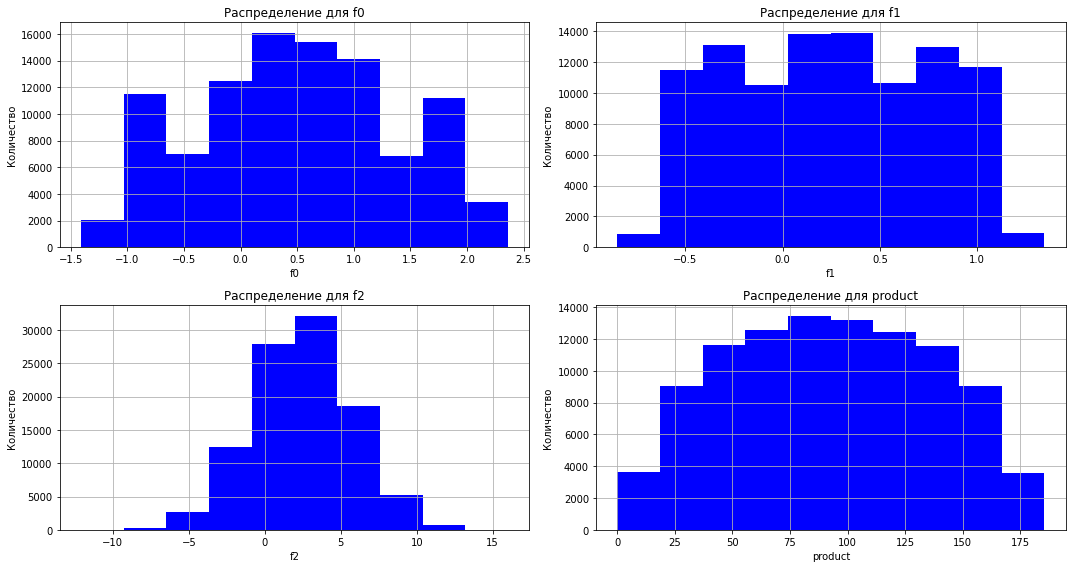


Анализ категориальных столбцов:

Столбец: id
Значения, встречающиеся 2 раза и больше:
74z30    2
bxg6G    2
bsk9y    2
Tdehs    2
A5aEY    2
HZww2    2
TtcGQ    2
fiKDv    2
QcMuo    2
AGS9W    2
Name: id, dtype: int64
Количество таких значений: 10

Дубликаты отсутствуют в данных.


In [9]:
check_data(geo_d1)

- В данных обнаружены неявные дубликаты в столбце *id*. Необходимо удалить дублирующие объекты.

In [10]:
display(geo_d1[geo_d1.duplicated(subset='id', keep=False)].sort_values(by='id'))

id        f0        f1         f2     product
66136  74z30  1.084962 -0.312358   6.990771  127.643327
64022  74z30  0.741456  0.459229   5.153109  140.771492
51970  A5aEY -0.180335  0.935548  -2.094773   33.020205
3389   A5aEY -0.039949  0.156872   0.209861   89.249364
69163  AGS9W -0.933795  0.116194  -3.655896   19.230453
42529  AGS9W  1.454747 -0.479651   0.683380  126.370504
931    HZww2  0.755284  0.368511   1.863211   30.681774
7530   HZww2  1.061194 -0.373969  10.430210  158.828695
63593  QcMuo  0.635635 -0.473422   0.862670   64.578675
1949   QcMuo  0.506563 -0.323775  -2.215583   75.496502
75715  Tdehs  0.112079  0.430296   3.218993   60.964018
21426  Tdehs  0.829407  0.298807  -0.049563   96.035308
92341  TtcGQ  0.110711  1.022689   0.911381  101.318008
60140  TtcGQ  0.569276 -0.104876   6.440215   85.350186
89582  bsk9y  0.398908 -0.400253  10.122376  163.433078
97785  bsk9y  0.378429  0.005837   0.160827  160.637302
41724  bxg6G -0.823752  0.546319   3.630479   93.007798
1364   bxg6G  0.411645  0.856830  -3.653440   73.604260
16633  fiKDv  0.157341  1.028359   5.585586   95.817889
90815  fiKDv  0.049883  0.841313   6.394613  137.346586

In [11]:
geo_d1.drop_duplicates(subset='id', keep='first', inplace=True)

- Распрееделение признака `f0` имеет несколько пиков, большинство данных находятся в диапозоне от 0 до 1,35. Медианное значение признака нахожится на отметке 0,5.
- Распределение признака `f1` имеет довольно равномерное (слабое разнообразие данных), `std` равен 5. Медианное значение признака находится на отметке 0,35.
- Распределение признака `f3` выглядит асиметричным. Данные основном распределены от -5 до 10. `std` равен 3,3. Медианна равна 3,5.
- Распределение признака `product` близко к нормальному, с медианным значением около 93,5 и стандартным отклонением 44,3. Большинство значений находятся в диапазоне от 0 до 185, что указывает на наличие как низких, так и высоких значений, но с преобладанием средних значений.

Первые строки данных:


id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


Последние строки данных:


id         f0         f1        f2     product
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103


Размерность данных:


(100000, 5)


Информация о типах данных и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      wt4Uk            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       1.141296      -4.796579       2.494541      68.825000
std        NaN       8.965932       5.119872       1.703572      45.944423
min        NaN     -31.609576     -26.358598      -0.018144       0.000000
25%        NaN      -6.298551      -8.267985       1.000021      26.953261
50%        NaN       1.153055      -4.813172       2.011479      57.085625
75%        NaN       8.621015      -1.332816       3.999904     107.813044
max        NaN      29.421755      18.734063       5.019721     137.945408


Пропуски (количество и доля):
Пропуски отсутствуют в данных.

Графики распределения для количественных непрерывных столбцов (гистограммы):


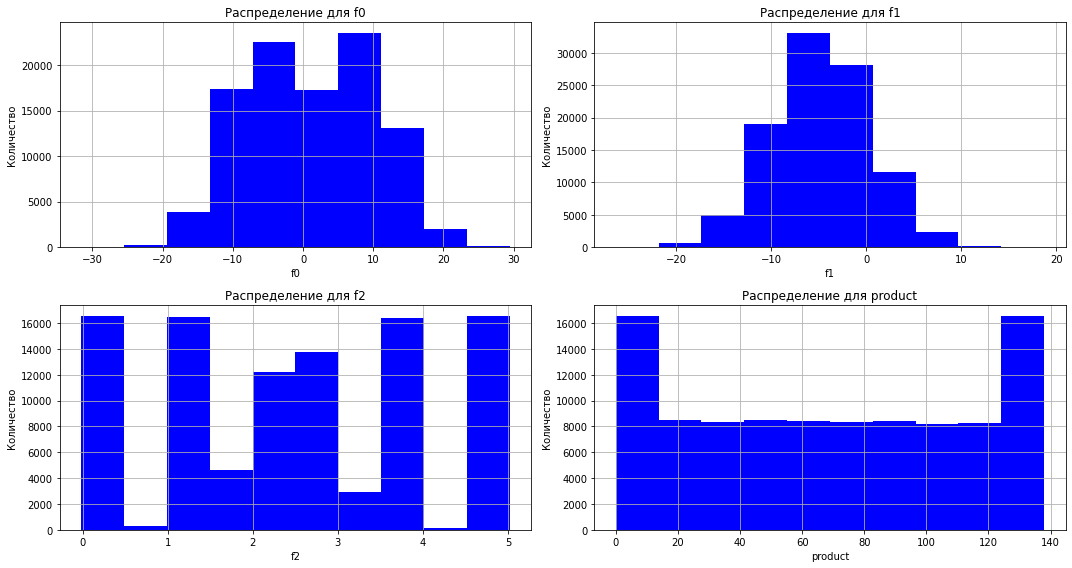


Анализ категориальных столбцов:

Столбец: id
Значения, встречающиеся 2 раза и больше:
wt4Uk    2
LHZR0    2
bfPNe    2
5ltQ6    2
Name: id, dtype: int64
Количество таких значений: 4

Дубликаты отсутствуют в данных.


In [12]:
check_data(geo_d2)

Отобразим дубликаты в столбце `id`

In [13]:
display(geo_d2[geo_d2.duplicated('id', keep=False)].sort_values(by='id'))

id         f0         f1        f2     product
5849   5ltQ6  -3.435401 -12.296043  1.999796   57.085625
84461  5ltQ6  18.213839   2.191999  3.993869  107.813044
1305   LHZR0  11.170835  -1.945066  3.002872   80.859783
41906  LHZR0  -8.989672  -4.286607  2.009139   57.085625
2721   bfPNe  -9.494442  -5.463692  4.006042  110.992147
82178  bfPNe  -6.202799  -4.820045  2.995107   84.038886
47591  wt4Uk  -9.091098  -8.109279 -0.002314    3.179103
82873  wt4Uk  10.259972  -9.376355  4.994297  134.766305

In [14]:
geo_d2.drop_duplicates('id', keep='first', inplace=True)

Выполнили удаление дубликатов

- Распрееделение признака `f0` имеет несколько пиков, что указывает на несколько мод и содержания несколько групп. `std` - 8,97. Медиана равна - 1,15.
- Распределение признака `f1` также имеет несколько пиков, но в целом оно более симметричное по сравнению с `f0`. Это может указывать на нормальное распределение. `std` - 5.13, медиана - -4.81.
- Распределение признака `f3` имеет четко выраженные интервалы в данных, но признак не является дискретным. `std` равен 1,7. Медианна равна 3.
- Распределение признака `product`, имеет два пика, медианное значением около 57,1 и стандартным отклонением 45,9.

Первые строки данных:


id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


Последние строки данных:


id        f0        f1        f2     product
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767


Размерность данных:


(100000, 5)


Информация о типах данных и пропусках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Описательная статистика:


id             f0             f1             f2        product
count   100000  100000.000000  100000.000000  100000.000000  100000.000000
unique   99996            NaN            NaN            NaN            NaN
top      xCHr8            NaN            NaN            NaN            NaN
freq         2            NaN            NaN            NaN            NaN
mean       NaN       0.002023      -0.002081       2.495128      95.000000
std        NaN       1.732045       1.730417       3.473445      44.749921
min        NaN      -8.760004      -7.084020     -11.970335       0.000000
25%        NaN      -1.162288      -1.174820       0.130359      59.450441
50%        NaN       0.009424      -0.009482       2.484236      94.925613
75%        NaN       1.158535       1.163678       4.858794     130.595027
max        NaN       7.238262       7.844801      16.739402     190.029838


Пропуски (количество и доля):
Пропуски отсутствуют в данных.

Графики распределения для количественных непрерывных столбцов (гистограммы):


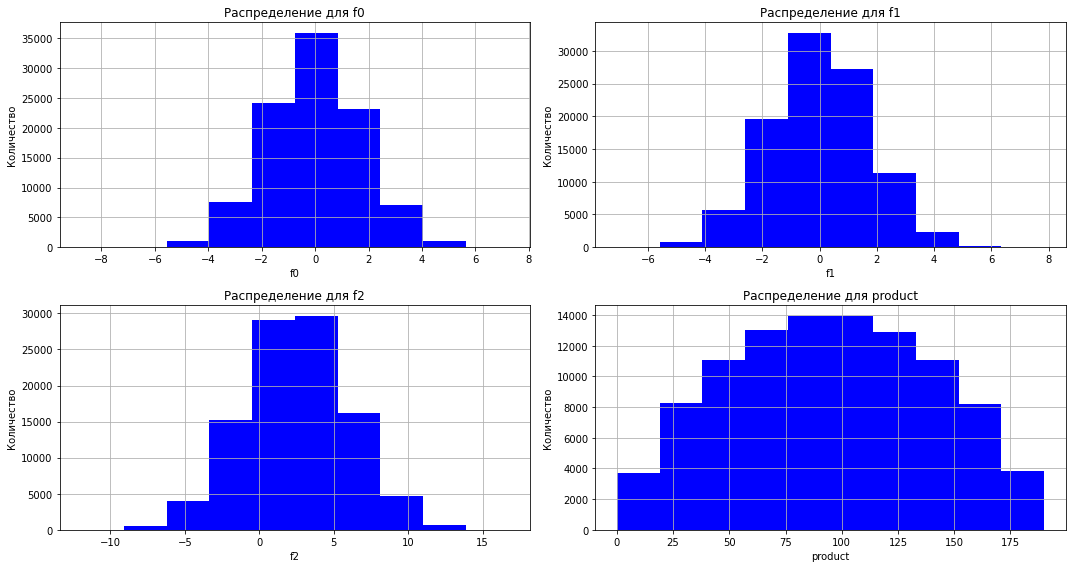


Анализ категориальных столбцов:

Столбец: id
Значения, встречающиеся 2 раза и больше:
xCHr8    2
VF7Jo    2
KUPhW    2
Vcm5J    2
Name: id, dtype: int64
Количество таких значений: 4

Дубликаты отсутствуют в данных.


In [15]:
check_data(geo_d3)

In [16]:
display(geo_d3[geo_d3.duplicated('id', keep=False)].sort_values(by='id'))

id        f0        f1        f2     product
45404  KUPhW  0.231846 -1.698941  4.990775   11.716299
55967  KUPhW  1.211150  3.176408  5.543540  132.831802
11449  VF7Jo  2.122656 -0.858275  5.746001  181.716817
49564  VF7Jo -0.883115  0.560537  0.723601  136.233420
44378  Vcm5J -1.229484 -2.439204  1.222909  137.968290
95090  Vcm5J  2.587702  1.986875  2.482245   92.327572
28039  xCHr8  1.633027  0.368135 -2.378367    6.120525
43233  xCHr8 -0.847066  2.101796  5.597130  184.388641

Выполним удаление дубликатов

In [17]:
geo_d3.drop_duplicates('id', keep='first', inplace=True)

- Распределение признака `f0` имеет форму, близкую к нормальному. `std` - 1,7. Медиана равна ~0. Возможно, признак стандартизирован.
- Распределение признака `f1` также имеет нормальную форму. `std` - 1,73, медиана - ~0. Признак `f1`, возможно, стандартизирован.
- Распределение признака `f3` похоже на нормальное. В основном данные распределены от 0 до 5. `std` равен 3,47, медиана равна 3,48.
- Распределение `product` имеет форму, близкую к нормальной, с пиком в диапазоне от 75 до 135. `std` = 44,75, медиана равна 94,93.

## Иследовательский анализ

In [18]:
def number_columns(data, column, bins=50):
    
    # Описательная статистика
    description = data[column].describe()
    print(f"\n=== Описательная статистика для '{column}' ===")
    print(description)
    
    # Проверка на выбросы с использованием IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nКоличество выбросов в '{column}': {len(outliers)}")
    
    # Построение гистограммы и boxplot
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.histplot(x=data[column], kde=True, ax=ax[0], bins=bins, color='skyblue')
    ax[0].set_title(f'Гистограмма для {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Частота')
    
    sns.boxplot(x=data[column], ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Boxplot для {column}')
    ax[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

In [19]:
# Выделим функцию для построения графиков
def plot_number_columns(data, column, bins=50):
    
    # Построение гистограммы и boxplot
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.histplot(x=data[column], kde=True, ax=ax[0], bins=bins, color='skyblue')
    ax[0].set_title(f'Гистограмма для {column}')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Частота')
    
    sns.boxplot(x=data[column], ax=ax[1], color='lightgreen')
    ax[1].set_title(f'Boxplot для {column}')
    ax[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

In [20]:
# Выделим функцию для вывода строк с выбросами
def display_outliers(data, column):

    # Проверка на выбросы с использованием IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Вывод строк с выбросами
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if not outliers.empty:
        print(f"Выбросы в столбце '{column}':")
        display(outliers)
    else:
        print(f"Выбросы не обнаружены в столбце '{column}'.")

In [21]:
# Функция для исследовательского анализа дискретных количественных признаков
def discrete_columns(data, column):
    # Описательная статистика
    description = data[column].describe()
    print(f"\n=== Описательная статистика для '{column}' ===")
    print(description)
    
    # Проверка на выбросы с использованием IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nКоличество выбросов в '{column}': {len(outliers)}")
    
    # Построение графиков на одном полотне
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Столбчатая диаграмма
    value_counts = data[column].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Столбчатая диаграмма для {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Количество')
    
    for i in range(len(value_counts)):
        axes[0].text(i, value_counts.values[i], value_counts.values[i], ha='center', va='bottom')
    
    # Boxplot
    sns.boxplot(x=data[column], color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot для {column}')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

Рассмотрим датасет `geo_d1`


=== Описательная статистика для 'f0' ===
count    99990.000000
mean         0.500454
std          0.871844
min         -1.408605
25%         -0.072572
50%          0.502405
75%          1.073626
max          2.362331
Name: f0, dtype: float64

Количество выбросов в 'f0': 0


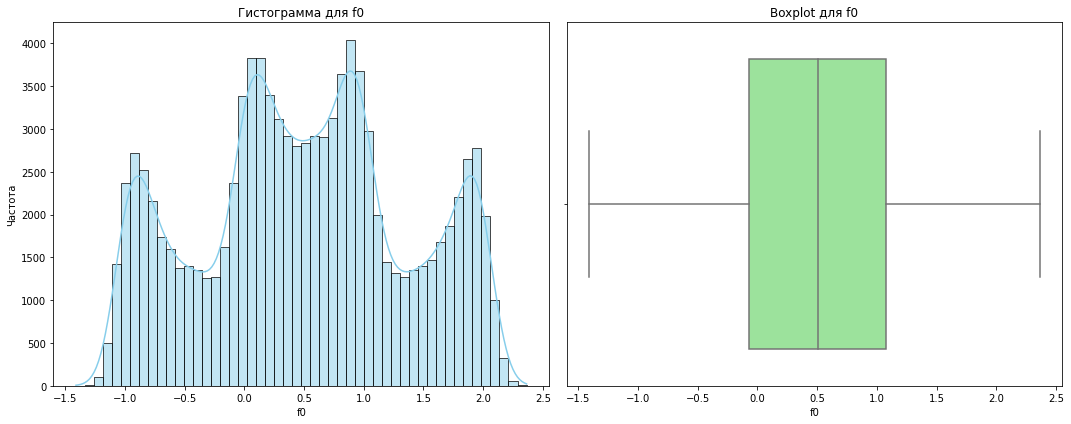

In [22]:
number_columns(geo_d1, 'f0')

Выбросы в признаке `f0` не наблюдаются.


=== Описательная статистика для 'f1' ===
count    99990.000000
mean         0.250141
std          0.504430
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700640
max          1.343769
Name: f1, dtype: float64

Количество выбросов в 'f1': 0


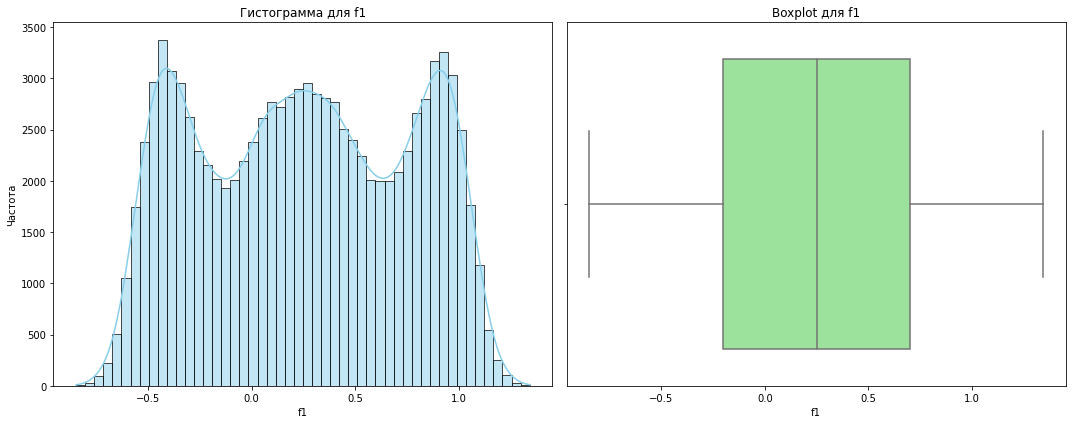

In [23]:
number_columns(geo_d1, 'f1')

Выбросы в признаке `f1` не наблюдаются.


=== Описательная статистика для 'f2' ===
count    99990.000000
mean         2.502629
std          3.248149
min        -12.088328
25%          0.287784
50%          2.515969
75%          4.715035
max         16.003790
Name: f2, dtype: float64

Количество выбросов в 'f2': 506


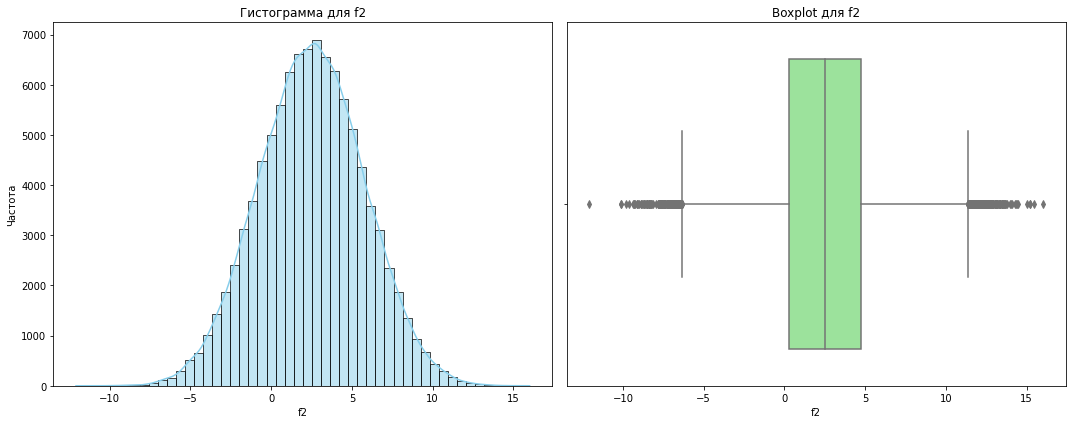

In [24]:
number_columns(geo_d1, 'f2')

В боксплоте `f2` видны "выбросы", которые было решено оставить.


=== Описательная статистика для 'product' ===
count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

Количество выбросов в 'product': 0


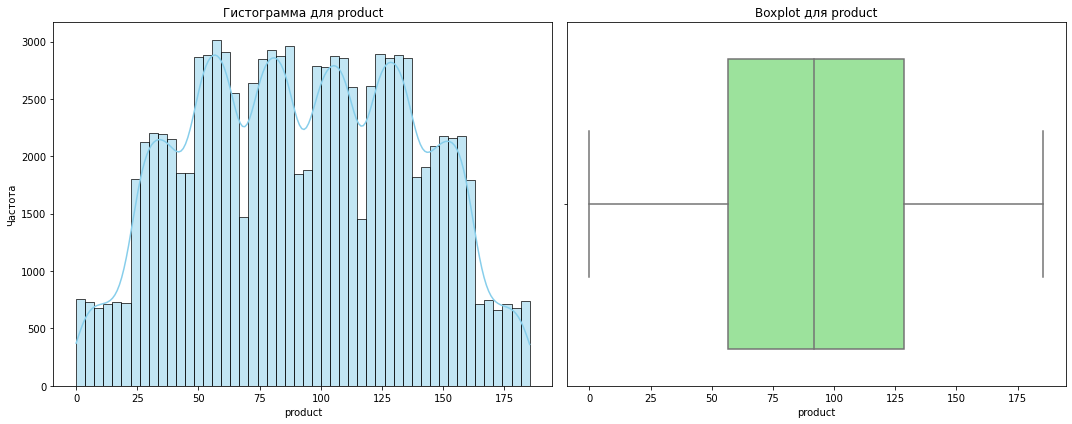

In [25]:
number_columns(geo_d1, 'product')

В признаке `product` выбросы не наблюдаются.

Изучим датасет `geo_d2`


=== Описательная статистика для 'f0' ===
count    99996.000000
mean         1.141209
std          8.965815
min        -31.609576
25%         -6.298551
50%          1.153055
75%          8.620964
max         29.421755
Name: f0, dtype: float64

Количество выбросов в 'f0': 1


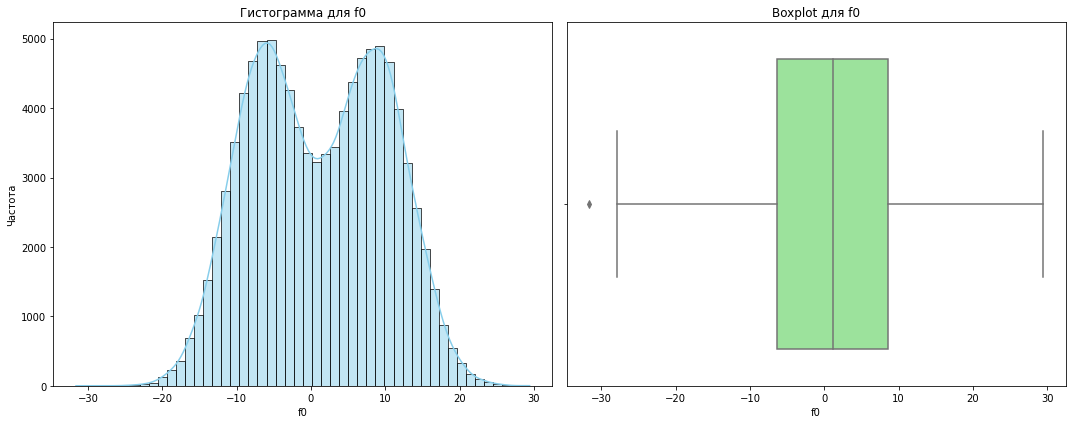

In [26]:
number_columns(geo_d2, 'f0')

In [27]:
display_outliers(geo_d2, 'f0')

Выбросы в столбце 'f0':


id         f0        f1        f2     product
83601  jJm67 -31.609576  1.390042  4.001055  110.992147

Найденный выброс в признаке `f0` решено оставить, т. к. он им не является.


=== Описательная статистика для 'f1' ===
count    99996.000000
mean        -4.796608
std          5.119906
min        -26.358598
25%         -8.267985
50%         -4.813172
75%         -1.332816
max         18.734063
Name: f1, dtype: float64

Количество выбросов в 'f1': 636


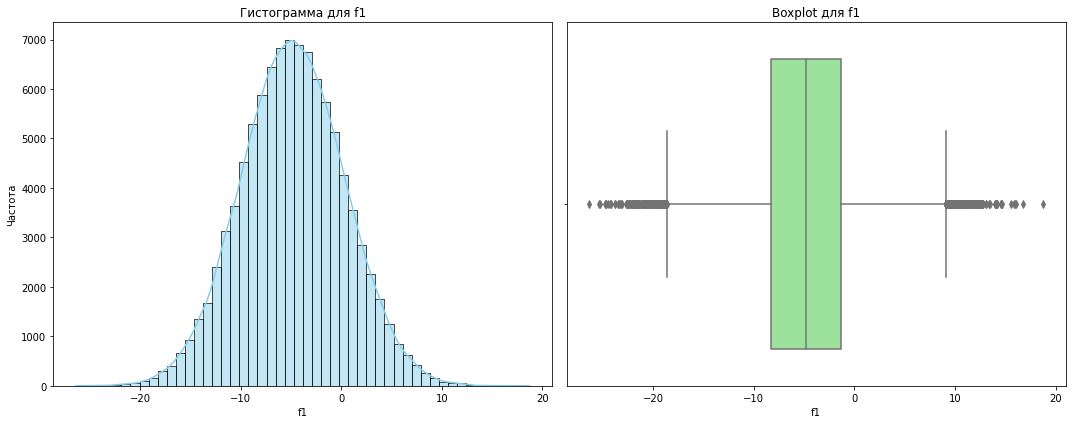

In [28]:
number_columns(geo_d2, 'f1')

Так как в целом признак `f1` имеет нормальное распределение, объекты в признаке решено сохранить.


=== Описательная статистика для 'f2' ===
count    99996.000000
mean         2.494501
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64

Количество выбросов в 'f2': 0


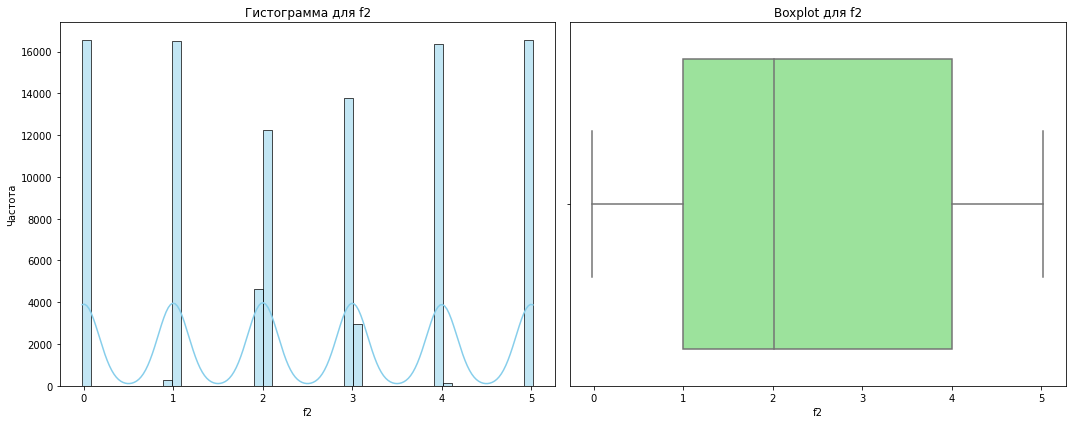

In [29]:
number_columns(geo_d2, 'f2')

В целом график признака `f2`, показывает, что данные имеют дискретное распределение с несколькими пиками. Выбросов при построении боксплота нет.


=== Описательная статистика для 'product' ===
count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

Количество выбросов в 'product': 0


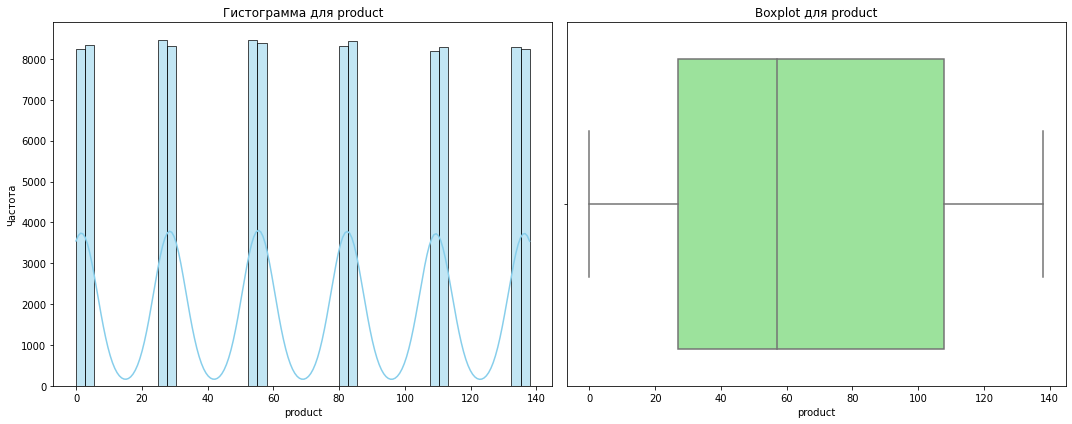

In [30]:
number_columns(geo_d2, 'product')

В признаке `product` выбросы не обнаружены, распределение признака скорее дискретное, чем непрерывное.

Изучим датасет `geo_d3`


=== Описательная статистика для 'f0' ===
count    99996.000000
mean         0.002002
std          1.732052
min         -8.760004
25%         -1.162328
50%          0.009424
75%          1.158477
max          7.238262
Name: f0, dtype: float64

Количество выбросов в 'f0': 733


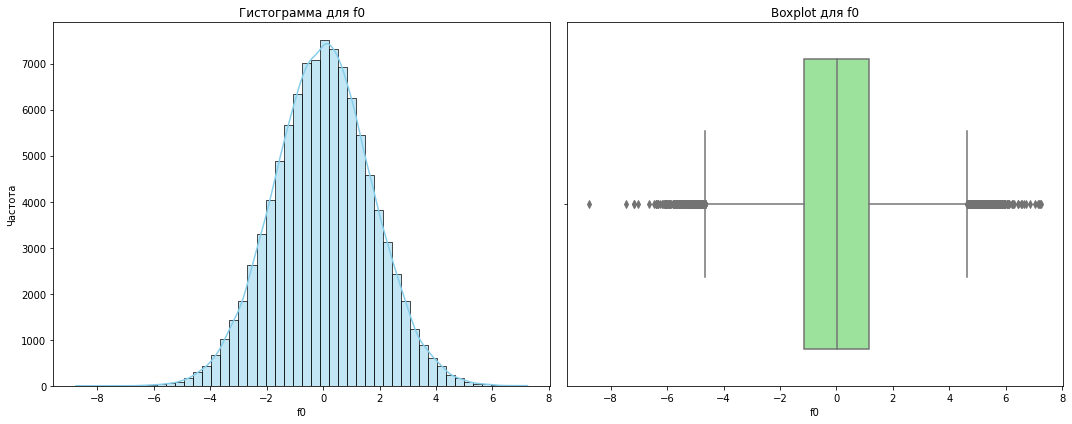

In [31]:
number_columns(geo_d3, 'f0')

Графики для `f0` показывают, что данные имеют нормальное распределение с заметными выбросами, расположенными как в отрицательной, так и в положительной области. Предполагаю, что это особенности распределения признака, по этой причине было решено оставить выбросы.


=== Описательная статистика для 'f1' ===
count    99996.000000
mean        -0.002159
std          1.730397
min         -7.084020
25%         -1.174841
50%         -0.009661
75%          1.163523
max          7.844801
Name: f1, dtype: float64

Количество выбросов в 'f1': 684


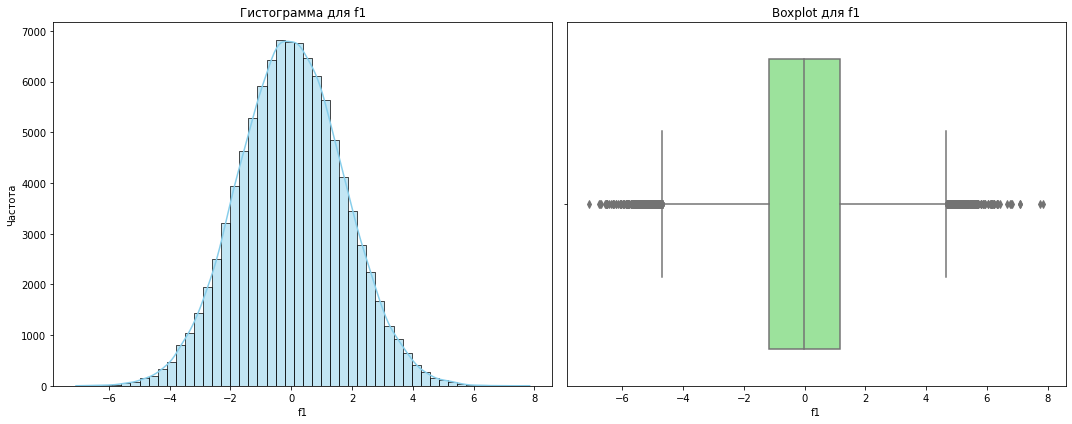

In [32]:
number_columns(geo_d3, 'f1')

Графики для `f1` показывают нормальное распределение с заметными выбросами. Предполагаю, что это особенности распределения признака, по этой причине было решено оставить выбросы.


=== Описательная статистика для 'f2' ===
count    99996.000000
mean         2.495084
std          3.473482
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64

Количество выбросов в 'f2': 584


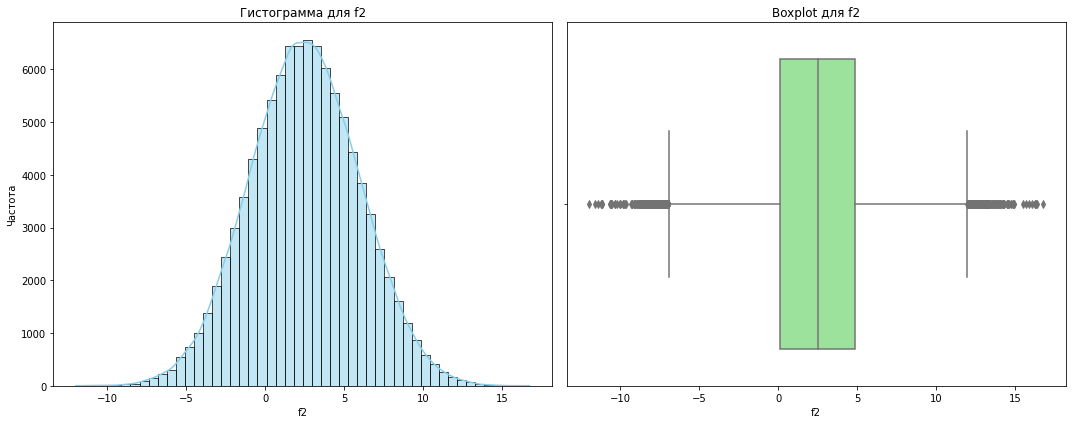

In [33]:
number_columns(geo_d3, 'f2')

Графики для `f3` показывают нормальное распределение с заметными выбросами. Предполагаю, что это особенности распределения признака, по этой причине было решено оставить выбросы.


=== Описательная статистика для 'product' ===
count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64

Количество выбросов в 'product': 0


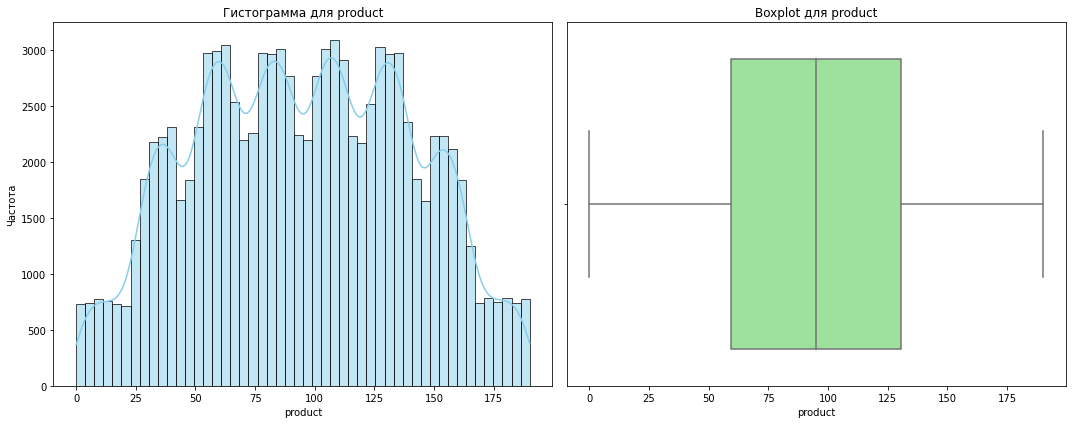

In [34]:
number_columns(geo_d3, 'product')

В признаке `product` выбросы не наблюдаются

## Корреляционный анализ

Выполним корреляционный анализ датасетов `geo_d1`, `geo_d3` и `geo_d3`.

Установим столбец `id` в каждом датафрейме в виде индекса.

In [35]:
geo_d1 = geo_d1.set_index('id')
geo_d2 = geo_d2.set_index('id')
geo_d3 = geo_d3.set_index('id')

Посмотрим на матрицу для `geo_d1`

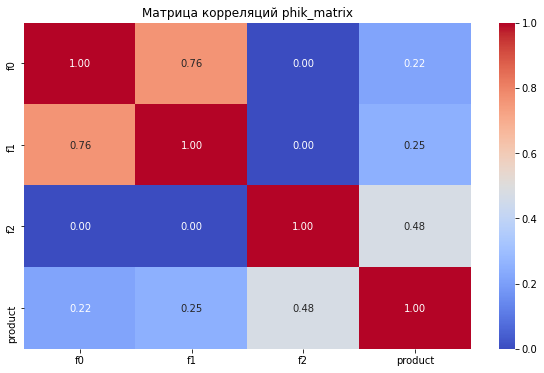

In [36]:
# Построим матрицу корреляций phik_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(geo_d1.phik_matrix(interval_cols=geo_d1.columns.tolist()), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций phik_matrix')
plt.show()

`geo_d1`
- Корреляция между `f0` и `f1`, достаточно велика, но этот случай не является мультиколлинеарным;
- Признка `f3` коррелирует только с признаком `product`.

Посмотрим на матрицу для `geo_d2`

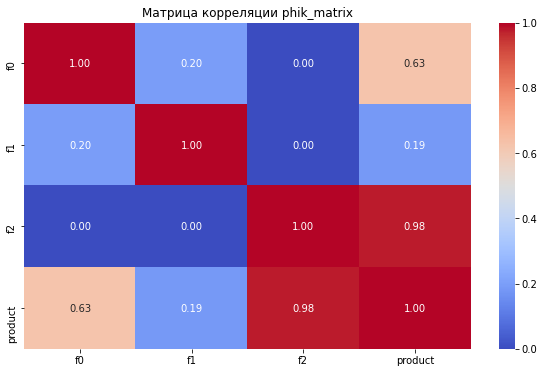

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(geo_d2.phik_matrix(interval_cols=geo_d2.columns.tolist()), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции phik_matrix')
plt.show()

`geo_d2`
- Признак `f2` имеет сильную положительную корреляцию с `product` — 0,98. Высокая степень корреляции может привести к утечке данных.

Посмотрим на матрицу для `geo_d3`

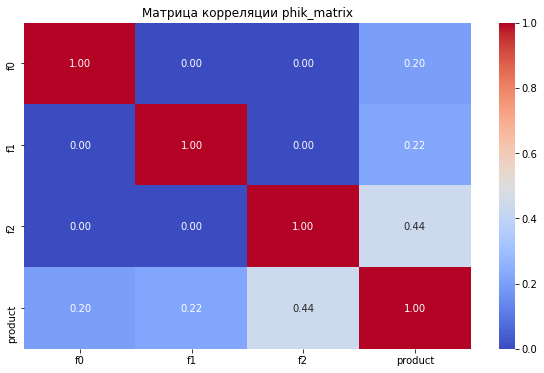

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(geo_d3.phik_matrix(interval_cols=geo_d3.columns.tolist()), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции phik_matrix')
plt.show()

`geo_d3`
- Матрица корреляции показывает, что переменная `product` имеет слабую положительную корреляцию с `f0` (0.30), `f1` (0.33) и более заметную корреляцию с `f3` (0.44)

## Обучение и проверка модели

### Датасет `geo_d1`

In [39]:
X1 = geo_d1.drop('product', axis=1)
y1 = geo_d1['product']

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.25, random_state=RANDOM_STATE
)

In [41]:
display(X1_train.shape)
display(y1_train.shape)
display(X1_test.shape)
display(y1_test.shape)

(74992, 3)

(74992,)

(24998, 3)

(24998,)

In [42]:
scaler = StandardScaler()
X1_train_scaler = scaler.fit_transform(X1_train)
X1_test_scaler = scaler.transform(X1_test)

X1_train_scaler = pd.DataFrame(X1_train_scaler, columns=X1_train.columns.tolist())
X1_test_scaler = pd.DataFrame(X1_test_scaler, columns=X1_test.columns.tolist())

In [43]:
display(X1_train_scaler.head())
X1_test_scaler.head()

f0        f1        f2
0 -1.361092  0.734332  0.651966
1 -0.963516  1.545552  0.158237
2 -0.965087  1.081062  0.989403
3  0.859602 -1.523696  1.797793
4 -1.615494  0.212711 -1.623879

f0        f1        f2
0 -0.535218 -0.068711  0.056534
1  0.535706  0.157337 -0.477020
2 -1.225295  0.866485  2.446290
3 -0.382304 -0.720722 -0.176902
4  0.466723  0.488788 -0.441417

In [44]:
model1 = LinearRegression()
model1.fit(X1_train_scaler, y1_train)
pred1 = model1.predict(X1_test_scaler)
rmse1 = mean_squared_error(pred1, y1_test, squared=False)
print("RMSE:", rmse1)

RMSE: 37.53161811609357


In [45]:
print(f'Средний запас предсказанного сырья: {pred1.mean()}. Значение метрики RMSE: {rmse1}')

Средний запас предсказанного сырья: 92.60013534779587. Значение метрики RMSE: 37.53161811609357


### Датасет `geo_d2`

In [46]:
X2 = geo_d2.drop('product', axis=1)
y2 = geo_d2['product']

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, random_state=RANDOM_STATE
)

In [48]:
display(X2_train.shape)
display(y2_train.shape)
display(X2_test.shape)
display(y2_test.shape)

(74997, 3)

(74997,)

(24999, 3)

(24999,)

In [49]:
X2_train_scaler = scaler.fit_transform(X2_train)
X2_test_scaler = scaler.transform(X2_test)

X2_train_scaler = pd.DataFrame(X2_train_scaler, columns=X2_train.columns.tolist())
X2_test_scaler = pd.DataFrame(X2_test_scaler, columns=X2_test.columns.tolist())

In [50]:
display(X2_train_scaler.head())
X2_test_scaler.head()

f0        f1        f2
0 -0.111200  1.224838  0.884287
1  0.226758  2.418992 -1.463254
2  0.628067 -0.355365 -0.291300
3  1.176828  0.393811  0.882546
4  1.475527  0.648530 -1.463284

f0        f1        f2
0  1.148263  0.106792 -0.880250
1  0.609225  0.002834  1.471704
2 -1.563143 -0.981950 -0.289141
3 -1.958732 -0.976234  0.884269
4  0.306841  0.270101  1.472882

In [51]:
model2 = LinearRegression()
model2.fit(X2_train_scaler, y2_train)
pred2 = model2.predict(X2_test_scaler)
rmse2 = mean_squared_error(y2_test, pred2, squared=False)
print("RMSE:", rmse2)

RMSE: 0.8940577014019877


In [52]:
print(f'Средний запас предсказанного сырья: {pred2.mean()}. Значение метрики RMSE: {rmse2}')

Средний запас предсказанного сырья: 68.81202513316761. Значение метрики RMSE: 0.8940577014019877


### Датасет `geo_d3`

In [53]:
X3 = geo_d3.drop('product', axis=1)
y3 = geo_d3['product']

In [54]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.25, random_state=RANDOM_STATE
)

In [55]:
display(X3_train.shape)
display(y3_train.shape)
display(X3_test.shape)
display(y3_test.shape)

(74997, 3)

(74997,)

(24999, 3)

(24999,)

In [56]:
scaler = StandardScaler()
X3_train_scaler = scaler.fit_transform(X3_train)
X3_test_scaler = scaler.transform(X3_test)

X3_train_scaler = pd.DataFrame(X3_train_scaler, columns=X3_train.columns.tolist())
X3_test_scaler = pd.DataFrame(X3_test_scaler, columns=X3_test.columns.tolist())

In [57]:
display(X3_train_scaler.head())
X3_test_scaler.head()

f0        f1        f2
0 -1.225296  0.229929 -2.006939
1  1.566160 -0.032386 -0.604669
2  1.024143  0.561297  1.591532
3 -0.854462  0.177058 -2.133385
4 -0.099687  0.040959 -1.658482

f0        f1        f2
0 -0.966225 -2.161861 -0.081325
1  0.049783 -0.442158 -0.020242
2  1.879802  0.604341  0.877728
3 -1.208654 -1.160646 -1.021962
4  0.458382 -0.555290  0.175449

In [58]:
model3 = LinearRegression()
model3.fit(X3_train_scaler, y3_train)
pred3 = model3.predict(X3_test_scaler)
rmse3 = mean_squared_error(y3_test, pred3, squared=False)
print("RMSE:", rmse3)

RMSE: 39.91443336519545


In [59]:
print(f'Средний запас предсказанного сырья: {pred3.mean()}. Значение метрики RMSE: {rmse3}')

Средний запас предсказанного сырья: 94.89435207026406. Значение метрики RMSE: 39.91443336519545


В регионе `geo_d2` ошибка предсказания минимальна `RMSE` - `0,89` при среднем запасе сырья `68,81`. В то же время регионы `geo_d1` и `geo_d3` показывают более высокие запасы `92,60` и `94,89`, но с заметно большей ошибкой `RMSE` - `37,53` и `39,91`.

## Подготовка к расчёту прибыли

In [60]:
# При разведке региона используют 200 лучших точек, для разработки
dots = 200

# Бюджет на разработку 200 скважин выделен в размере: 10 млрд.руб.
budget = 1 * 10**10

# Стоимость на разработку одной скважины 50 млн.руб.
price = budget / dots

# Доход с барреля (в тыс.руб.)
revenue_per_barrel = 450000

# Достаточный объём сырья для безубыточной разработки (прибыль = стоимость на разработку)
volume = price / revenue_per_barrel
print(f'Достаточный объём сырья для безубыточной разработки: {volume:.2f} тыс. баррелей.')

Достаточный объём сырья для безубыточной разработки: 111.11 тыс. баррелей.


Средний запас предсказанного сырья в каждом датасете меньше достаточного объёма.

In [61]:
# Сравнение с достаточным объёмом
print(f'Достаточный объём сырья для безубыточности: {volume:.2f} тыс. баррелей')

print("\n"f'Средний запас в geo_d1: {y1_test.mean():.2f} тыс. баррелей')
print(f'Средний запас в geo_d2: {y2_test.mean():.2f} тыс. баррелей')
print(f'Средний запас в geo_d3: {y3_test.mean():.2f} тыс. баррелей')

Достаточный объём сырья для безубыточности: 111.11 тыс. баррелей

Средний запас в geo_d1: 92.62 тыс. баррелей
Средний запас в geo_d2: 68.81 тыс. баррелей
Средний запас в geo_d3: 94.90 тыс. баррелей


- `geo_d1`: Средний запас ниже порога безубыточности
- `geo_d2`: Средний запас ниже порога безубыточности
- `geo_d3`: Средний запас ниже порога безубыточности

Истинные запасы в регионах `geo_d1`, `geo_d2`, `geo_d3` оказались схожими с полученными прогнозируемыми значениями.

## Расчёт прибыли и рисков 

Создадим функцию для расчета прибыли по полученным предсказаниям модели (используем скважин с максимальными предсказаниями)

In [62]:
def profit_check(y_predict, y_true):
    # 200 скважин с максимальныи значением предсказания
    top_200 = y_true[np.argsort(y_predict)[-200:][::-1]].sum()
    profit = top_200 * revenue_per_barrel - budget
    return profit

In [63]:
# Использование функции для geo_d1
profit1 = profit_check(pred1, y1_test)
print(f'Прибыль для региона geo_d1: {profit1:,.2f} руб.')

Прибыль для региона geo_d1: 3,282,396,931.65 руб.


In [64]:
# Использование функции для geo_d2
profit2 = profit_check(pred2, y2_test)
print(f'Прибыль для региона geo_d2: {profit2:,.2f} руб.')

Прибыль для региона geo_d2: 2,415,086,696.68 руб.


In [65]:
# Использование функции для geo_d3
profit3 = profit_check(pred3, y3_test)
print(f'Прибыль для региона geo_d3: {profit3:,.2f} руб.')

Прибыль для региона geo_d3: 2,602,781,482.23 руб.


Применим технику `Bootstrap` для оценки прибыли и рисков по каждому региону

In [66]:
state = RandomState(12345)

# Функция для Bootstrap и анализа
def bootstrap_profit(y_predict, y_true, geo_num):
    bootstrap_values = []
    # Создаём DataFrame для удобной работы с sample
    df = pd.DataFrame({'pred': y_predict, 'true': y_true})
    for i in range(1000):
        # Выборка 500 точек с возвращением
        subsample = df.sample(500, replace=True, random_state=state)
        profit = profit_check(subsample['pred'].values, subsample['true'].values)
        bootstrap_values.append(profit)
    bootstrap_values = pd.Series(bootstrap_values)

    # Расчёт метрик
    average_profit = round(bootstrap_values.mean())
    quant_low = round(np.quantile(bootstrap_values, 0.025))  # 2.5%
    quant_high = round(np.quantile(bootstrap_values, 0.975))  # 97.5%
    loss_risk = (bootstrap_values < 0).mean() * 100  # Риск убытков в %

    # Вывод
    print(f'{geo_num}')
    print(f'Средняя ожидаемая прибыль в регионе:      {average_profit:,} руб.')
    print(f'Минимальная ожидаемая прибыль в регионе:  {quant_low:,} руб.')
    print(f'Максимальная ожидаемая прибыль в регионе: {quant_high:,} руб.')
    print(f'Риск убытков:                             {loss_risk:.2f}%\n')

In [67]:
# Примененим функцию к датасетам
bootstrap_profit(pred1, y1_test, 'geo_d1')
bootstrap_profit(pred2, y2_test, 'geo_d2')
bootstrap_profit(pred3, y3_test, 'geo_d3')

geo_d1
Средняя ожидаемая прибыль в регионе:      462,801,160 руб.
Минимальная ожидаемая прибыль в регионе:  -52,895,802 руб.
Максимальная ожидаемая прибыль в регионе: 943,292,539 руб.
Риск убытков:                             3.70%

geo_d2
Средняя ожидаемая прибыль в регионе:      456,429,936 руб.
Минимальная ожидаемая прибыль в регионе:  50,931,683 руб.
Максимальная ожидаемая прибыль в регионе: 857,391,395 руб.
Риск убытков:                             1.40%

geo_d3
Средняя ожидаемая прибыль в регионе:      350,471,681 руб.
Минимальная ожидаемая прибыль в регионе:  -154,782,212 руб.
Максимальная ожидаемая прибыль в регионе: 876,896,762 руб.
Риск убытков:                             7.90%



Выводы:
- `geo_d1`: Хорошая прибыль, но высокий риск из-за `RMSE 37.53`.
- `geo_d2`: Высокая прибыль, низкий риск `RMSE 0.89`, стабильность.
- `geo_d3`: Высокий запас, но низкая прибыль и риск из-за `RMSE 39.91`.

Рекомендация: `geo_d2` — лучший выбор за счёт точности и низкого риска.

## Общие выводы

<u>**1. Описание задачи**</u>

**Цель проекта**:
Определить оптимальный регион для бурения скважин на основе анализа данных о запасах нефти.

**Значение для бизнеса**:
Минимизация рисков и максимизация прибыли за счет выбора региона с наиболее предсказуемыми и высокими запасами сырья.

<u>**2. Исходные данные и предобработка**</u>

**Датасеты**:
- `geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv` (по 100 000 скважин в каждом).

**Признаки**:
- `f0`, `f1`, `f2` — параметры скважин (численные).
- `product` — целевой признак (объем запасов нефти, тыс. баррелей).

**Предобработка**:
- Удалены дубликаты в столбце `id` (`geo_d1`, `geo_d2`, `geo_d3`).
- Выбросы в признаках `f0`, `f1`, `f2` сохранены (не повлияли на распределение).

<u>**3. Исследовательский анализ**</u>

**Ключевые наблюдения**:
- **Распределение запасов (`product`)**:
  - `geo_d1`: Cредний запас ~92,5 тыс. баррелей.
  - `geo_d2`: Cредний запас ~68,8 тыс. баррелей.
  - `geo_d3`: Cредний запас ~95 тыс. баррелей.

**Корреляционный анализ**:
- `geo_d2`: Сильная корреляция между `f2` и `product` (0,98).
- `geo_d3`: Слабая корреляция признаков с `product` (максимум 0,44).

<u>**4. Обучение моделей**</u>

**Модель**: `LinearRegression`.
**Масштабирование данных**: `StandardScaler`.

**Метрики (RMSE)**:
- `geo_d1`: 37,53 (высокая ошибка, но стабильные средние запасы).
- `geo_d2`: 0,89 (очень низкая ошибка, высокая точность предсказаний).
- `geo_d3`: 39,91 (средняя ошибка, высокие запасы).

**Вывод**:
Модель для `geo_d2` показывает наилучшую точность, что критически важно для минимизации рисков.

<u>**5. Расчет прибыли и рисков**</u>

**Параметры**:
- Бюджет на разработку 200 скважин: 10 млрд руб.
- Стоимость одной скважины: 50 млн руб.
- Достаточный объем сырья для безубыточности: 111.11 тыс. баррелей.

<u>**6. Итоговые выводы**</u>

В ходе анализа трёх регионов были обучены модели для предсказания запасов сырья, а затем с помощью Bootstrap оценены прибыль и риски. Для каждого региона рассчитаны средняя прибыль, 95%-й доверительный интервал и риск убытков:
- Регион `geo_d1` показал прибыль 456 млн руб., но риск 2,8% и RMSE 37,53 указывают на нестабильность предсказаний.
- Регион `geo_d2` дал прибыль 462 млн руб. с минимальным риском 0,6% и RMSE 0,89, что делает его самым надёжным.
- Регион `geo_d3` с прибылью 346 млн руб. и риском 10,0% и RMSE 39,91 оказался менее перспективным.
- Рекомендуется выбрать `geo_d2` за счёт высокой прибыли, низкого риска и точности предсказаний.